In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-44.08149477177395, -7.965646846839832),
 (42.50098726478748, 154.34355626945234),
 (-82.37821593957719, -90.82632649054389),
 (-27.62583131939666, -109.43794449467974),
 (-83.39245719547459, -168.09421526756304),
 (-66.34321944934845, 171.27724865727384),
 (47.59807224077079, 156.76981574697385),
 (77.6666574781157, -29.825245825424673),
 (-3.9194560818427533, -1.6027707133960973),
 (-71.3815618488362, -86.3727840892419),
 (-83.179489602829, -7.873046647232883),
 (-66.37127105342374, -45.66013449453311),
 (22.334708226891507, -179.20346043149019),
 (9.72876414481469, 92.70621370328348),
 (-20.49148009447599, -159.71711522307942),
 (9.6481761812135, 172.4154901679317),
 (-14.11141989735286, 154.33221136768748),
 (9.08605834242357, 168.1786315481471),
 (-76.78649932496681, -173.01876916807902),
 (-22.706849286595002, 95.92962983056373),
 (-80.57823425063097, -99.1873399731539),
 (84.1922294906162, 14.860247254805529),
 (-83.04361118295074, 110.62166260278906),
 (47.43164194025363, -63

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []
# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city cound to confirm sufficient count.
len(cities)

581

In [7]:
# Import the request library
import requests

# import the API key
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [8]:
# Import the time library and the datetime modeul from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities

    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("--------------------------")
print("Data Retieval Complete     ")
print("--------------------------")


Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | takoradi
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | port blair
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | samarai
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | alberton
Processing Record 21 of Set 1 | vredendal
Processing Rec

Processing Record 36 of Set 4 | puerto narino
Processing Record 37 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 4 | poya
Processing Record 39 of Set 4 | xining
Processing Record 40 of Set 4 | surgut
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | salto
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | maneadero
Processing Record 45 of Set 4 | saint-pierre
Processing Record 46 of Set 4 | litayen
City not found. Skipping...
Processing Record 47 of Set 4 | bengkulu
Processing Record 48 of Set 4 | finschhafen
Processing Record 49 of Set 4 | camden
Processing Record 50 of Set 4 | rogun
City not found. Skipping...
Processing Record 1 of Set 5 | shimoda
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | halalo
City not found. Skipping...
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | olinda
Processing Record 6 of Set 5 | tabiauea
City not found. Skipping...
Processing Reco

Processing Record 23 of Set 8 | gisborne
Processing Record 24 of Set 8 | warrington
Processing Record 25 of Set 8 | galesong
Processing Record 26 of Set 8 | bida
Processing Record 27 of Set 8 | stokmarknes
Processing Record 28 of Set 8 | plettenberg bay
Processing Record 29 of Set 8 | nagato
Processing Record 30 of Set 8 | new ulm
Processing Record 31 of Set 8 | hambantota
Processing Record 32 of Set 8 | ancud
Processing Record 33 of Set 8 | turlock
Processing Record 34 of Set 8 | emerald
Processing Record 35 of Set 8 | alugan
Processing Record 36 of Set 8 | mogadishu
Processing Record 37 of Set 8 | guicheng
City not found. Skipping...
Processing Record 38 of Set 8 | bridgetown
Processing Record 39 of Set 8 | mackay
Processing Record 40 of Set 8 | xai-xai
Processing Record 41 of Set 8 | nzega
Processing Record 42 of Set 8 | batemans bay
Processing Record 43 of Set 8 | aklavik
Processing Record 44 of Set 8 | marzuq
Processing Record 45 of Set 8 | san patricio
Processing Record 46 of Set

Processing Record 16 of Set 12 | boyolangu
Processing Record 17 of Set 12 | buraydah
Processing Record 18 of Set 12 | americo brasiliense
Processing Record 19 of Set 12 | dicabisagan
Processing Record 20 of Set 12 | yizheng
Processing Record 21 of Set 12 | nicolas bravo
Processing Record 22 of Set 12 | glendive
Processing Record 23 of Set 12 | steamboat springs
Processing Record 24 of Set 12 | batagay-alyta
Processing Record 25 of Set 12 | arusha
Processing Record 26 of Set 12 | turan
Processing Record 27 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 28 of Set 12 | catuday
Processing Record 29 of Set 12 | vysokovsk
Processing Record 30 of Set 12 | lekoni
Processing Record 31 of Set 12 | virtsu
--------------------------
Data Retieval Complete     
--------------------------


In [10]:
#  Convert the array of dictionaires to a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,-33.0117,17.9442,65.30,97,21,9.13,ZA,2022-02-01 20:10:41
1,Punta Arenas,-53.1500,-70.9167,53.62,50,40,42.57,CL,2022-02-01 20:10:41
2,Rikitea,-23.1203,-134.9692,78.08,70,87,6.42,PF,2022-02-01 20:10:42
3,Vaini,-21.2000,-175.2000,82.56,78,75,4.61,TO,2022-02-01 20:07:40
4,Bluff,-46.6000,168.3333,69.80,74,100,13.04,NZ,2022-02-01 20:10:42
5,Severo-Kurilsk,50.6789,156.1250,26.80,79,76,10.47,RU,2022-02-01 20:10:42
6,Takoradi,4.8845,-1.7554,80.53,80,34,8.70,GH,2022-02-01 20:10:43
7,Hermanus,-34.4187,19.2345,70.90,84,26,1.05,ZA,2022-02-01 20:10:43
8,Ushuaia,-54.8000,-68.3000,51.42,81,75,37.98,AR,2022-02-01 20:10:43
9,Kapaa,22.0752,-159.3190,75.52,72,40,1.01,US,2022-02-01 20:10:44


In [11]:
new_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saldanha,ZA,2022-02-01 20:10:41,-33.0117,17.9442,65.30,97,21,9.13
1,Punta Arenas,CL,2022-02-01 20:10:41,-53.1500,-70.9167,53.62,50,40,42.57
2,Rikitea,PF,2022-02-01 20:10:42,-23.1203,-134.9692,78.08,70,87,6.42
3,Vaini,TO,2022-02-01 20:07:40,-21.2000,-175.2000,82.56,78,75,4.61
4,Bluff,NZ,2022-02-01 20:10:42,-46.6000,168.3333,69.80,74,100,13.04
5,Severo-Kurilsk,RU,2022-02-01 20:10:42,50.6789,156.1250,26.80,79,76,10.47
6,Takoradi,GH,2022-02-01 20:10:43,4.8845,-1.7554,80.53,80,34,8.70
7,Hermanus,ZA,2022-02-01 20:10:43,-34.4187,19.2345,70.90,84,26,1.05
8,Ushuaia,AR,2022-02-01 20:10:43,-54.8000,-68.3000,51.42,81,75,37.98
9,Kapaa,US,2022-02-01 20:10:44,22.0752,-159.3190,75.52,72,40,1.01


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

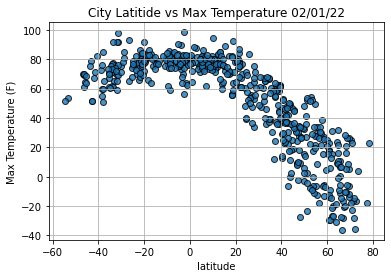

In [14]:
# Import time module
import time

# Build the scatter plots for lattitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

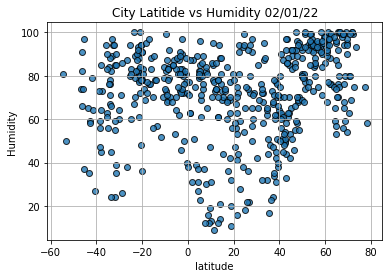

In [15]:
# Build the scatter plots for lattitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

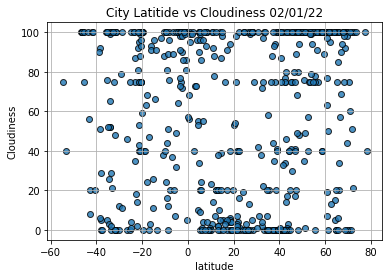

In [16]:
# Build the scatter plots for lattitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

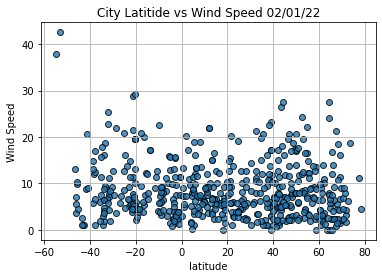

In [17]:
# Build the scatter plots for lattitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on teh weather data
# and plot a regression line and the equation wtih teh data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [19]:
index13 = city_data_df.loc[13]
index13

City                      Samarai
Country                        PG
Date          2022-02-01 20:10:45
Lat                      -10.6167
Lng                      150.6667
Max Temp                    80.74
Humidity                       79
Cloudiness                    100
Wind Speed                  12.71
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
530     True
531     True
532     True
533    False
534     True
Name: Lat, Length: 535, dtype: bool

In [21]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Severo-Kurilsk,RU,2022-02-01 20:10:42,50.6789,156.1250,26.80,79,76,10.47
6,Takoradi,GH,2022-02-01 20:10:43,4.8845,-1.7554,80.53,80,34,8.70
9,Kapaa,US,2022-02-01 20:10:44,22.0752,-159.3190,75.52,72,40,1.01
10,Port Blair,IN,2022-02-01 20:10:44,11.6667,92.7500,74.91,73,7,3.56
12,Butaritari,KI,2022-02-01 20:10:44,3.0707,172.7902,81.50,75,73,10.94
...,...,...,...,...,...,...,...,...,...
528,Batagay-Alyta,RU,2022-02-01 20:24:10,67.8006,130.4114,-10.53,99,100,1.41
530,Turan,VN,2022-02-01 20:24:10,16.0678,108.2208,69.78,73,75,2.30
531,Catuday,PH,2022-02-01 20:24:11,16.2923,119.8062,75.00,74,3,12.21
532,Vysokovsk,RU,2022-02-01 20:24:11,56.3167,36.5500,26.46,93,100,8.84


In [22]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saldanha,ZA,2022-02-01 20:10:41,-33.0117,17.9442,65.30,97,21,9.13
1,Punta Arenas,CL,2022-02-01 20:10:41,-53.1500,-70.9167,53.62,50,40,42.57
2,Rikitea,PF,2022-02-01 20:10:42,-23.1203,-134.9692,78.08,70,87,6.42
3,Vaini,TO,2022-02-01 20:07:40,-21.2000,-175.2000,82.56,78,75,4.61
4,Bluff,NZ,2022-02-01 20:10:42,-46.6000,168.3333,69.80,74,100,13.04
...,...,...,...,...,...,...,...,...,...
515,Nsunga,TZ,2022-02-01 20:24:00,-1.1439,31.3947,62.69,82,99,1.21
520,Boyolangu,ID,2022-02-01 20:24:08,-8.1181,111.8935,74.10,92,76,4.21
522,Americo Brasiliense,BR,2022-02-01 20:24:08,-21.7244,-48.1017,70.43,92,100,4.41
529,Arusha,TZ,2022-02-01 20:24:10,-3.3667,36.6833,63.50,81,91,1.83


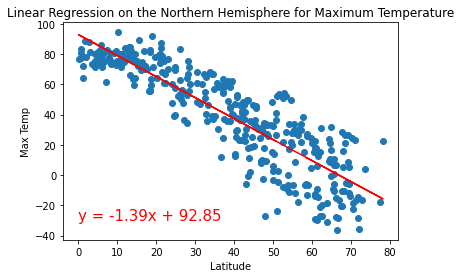

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \
for Maximum Temperature", 'Max Temp',(0,-30))

In [24]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=-1.3880935995953823, intercept=92.85156344457943, rvalue=-0.8753172288440014, pvalue=2.8006082566066895e-116, stderr=0.040303205093587945, intercept_stderr=1.742755789397119)

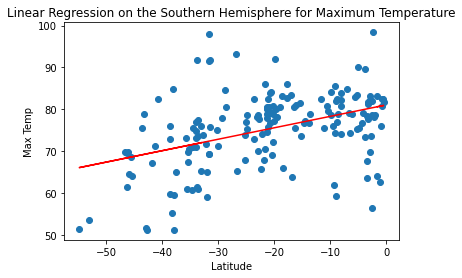

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \
for Maximum Temperature", 'Max Temp',(0,-30))

In [26]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=0.27322801573714434, intercept=81.05538762968202, rvalue=0.41990051098953013, pvalue=1.0834454025867009e-08, stderr=0.045427168924217276, intercept_stderr=1.142503760744426)

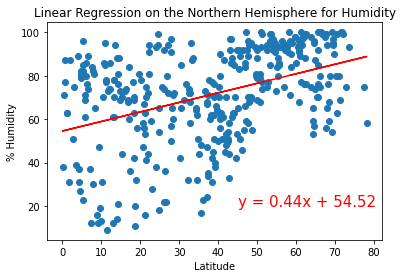

In [27]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \
for Humidity", '% Humidity',(45,20))

In [28]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=0.43898979077700234, intercept=54.52303087648173, rvalue=0.41179145629618674, pvalue=2.486502905274711e-16, stderr=0.051059168981097636, intercept_stderr=2.2078557310016667)

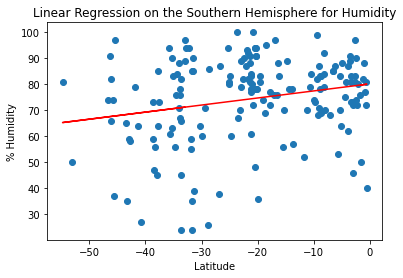

In [29]:
# Linear regression on the Souththern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \
for Humidity", '% Humidity',(-25,20))

In [30]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=0.2714490745654928, intercept=80.14810944311628, rvalue=0.22558225919284913, pvalue=0.0030114223741085177, stderr=0.0901776577584579, intercept_stderr=2.267988861380208)

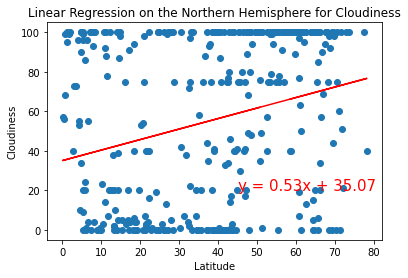

In [31]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \
for Cloudiness", 'Cloudiness',(45,20))

In [32]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=0.5316710239645188, intercept=35.07084236522272, rvalue=0.2628462848963329, pvalue=3.632612850719162e-07, stderr=0.10257490854836146, intercept_stderr=4.435454086205599)

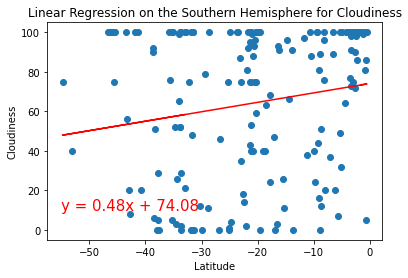

In [33]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \
for Cloudiness", 'Cloudiness',(-55,10))

In [34]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=0.4770794929608268, intercept=74.08159163640777, rvalue=0.1745668538763151, pvalue=0.022396366208081876, stderr=0.2069976592641575, intercept_stderr=5.206038803983603)

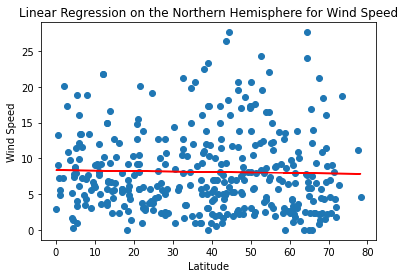

In [35]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \
for Wind Speed", 'Wind Speed',(0,35))

In [36]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=-0.0065119879631656994, intercept=8.352960286473792, rvalue=-0.023907242163162166, pvalue=0.649384612228289, stderr=0.014312176252269342, intercept_stderr=0.6188745526464995)

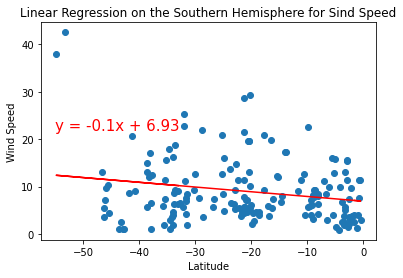

In [37]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \
for Sind Speed", 'Wind Speed',(-55,22))

In [38]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=-0.09975838799206362, intercept=6.928168721787536, rvalue=-0.201259806620602, pvalue=0.008300992976827978, stderr=0.0373482504072455, intercept_stderr=0.9393170993923599)